In [1]:
# Importing packages
import ipykernel
import pandas as pd
import statistics as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
# Importing cvs dataset
cf = pd.read_csv("nccdata.csv")
print (cf)

       RegionID  SizeRank      RegionName RegionType StateName  \
0           324        39     Wake County     county        NC   
1           324        40     Wake County     county        NC   
2           324        41     Wake County     county        NC   
3           324        42     Wake County     county        NC   
4           324        43     Wake County     county        NC   
...         ...       ...             ...        ...       ...   
29395      2059      3006  Tyrrell County     county        NC   
29396      2059      3006  Tyrrell County     county        NC   
29397      2059      3006  Tyrrell County     county        NC   
29398      2059      3006  Tyrrell County     county        NC   
29399      2059      3006  Tyrrell County     county        NC   

                  Metro  StateCodeFIPS  MunicipalCodeFIPS       Dates  \
0      Raleigh-Cary, NC             37                183   1/31/2000   
1      Raleigh-Cary, NC             37                183   2

In [3]:
# Remove rows where price is null 
nf = cf.dropna(subset=['Price'])
df = pd.DataFrame (nf)
df['month'] = pd.to_datetime(df['Dates'], format='%m/%d/%Y').dt.month
df.head

<bound method NDFrame.head of        RegionID  SizeRank      RegionName RegionType StateName  \
0           324        39     Wake County     county        NC   
1           324        40     Wake County     county        NC   
2           324        41     Wake County     county        NC   
3           324        42     Wake County     county        NC   
4           324        43     Wake County     county        NC   
...         ...       ...             ...        ...       ...   
29395      2059      3006  Tyrrell County     county        NC   
29396      2059      3006  Tyrrell County     county        NC   
29397      2059      3006  Tyrrell County     county        NC   
29398      2059      3006  Tyrrell County     county        NC   
29399      2059      3006  Tyrrell County     county        NC   

                  Metro  StateCodeFIPS  MunicipalCodeFIPS       Dates  \
0      Raleigh-Cary, NC             37                183   1/31/2000   
1      Raleigh-Cary, NC        

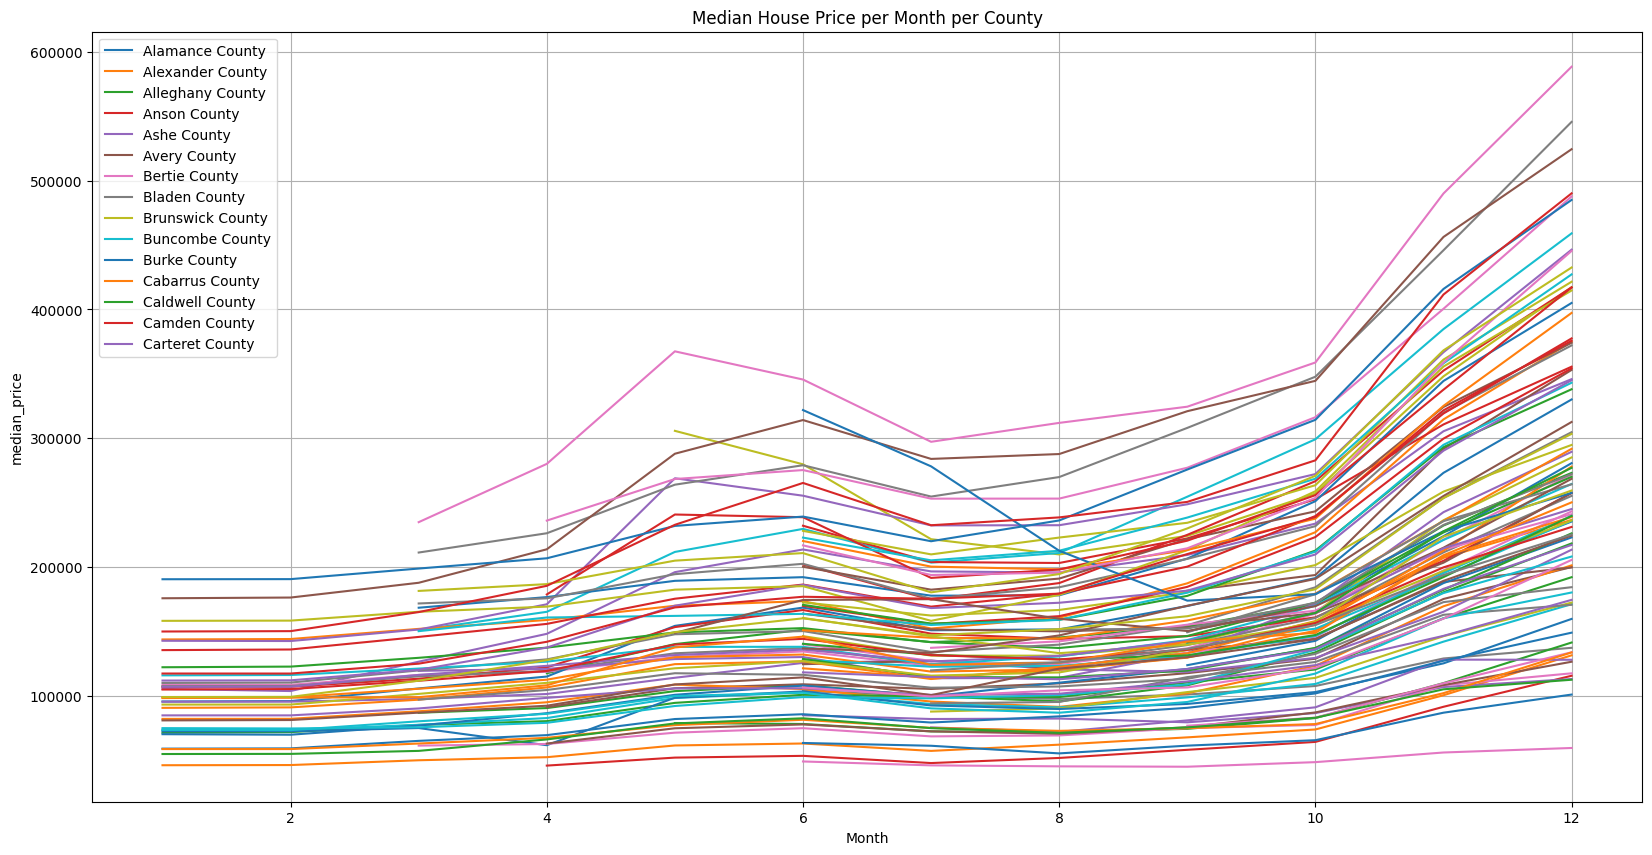

In [4]:
# get median house price per month per county
mdf = df.groupby(['RegionName','month']).agg( median_price=('Price','median'),
                                               county = ('RegionName','first'),
                                               month = ('month', 'first')
)

# Pivot the data to have months as rows and counties as columns
pivot_table = mdf.pivot(index='month', columns='county', values='median_price')

# Plot the data
plt.figure(figsize=(20, 10))

for county in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[county], label=county)

plt.xlabel('Month')
plt.ylabel('median_price')
plt.title('Median House Price per Month per County')
#plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
#plt.tight_layout();
# Limit the legend to display just 15 counties
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:15], labels[:15], loc='best')

# Save the plot
plt.savefig('median_house_prices_per_month_per_county.png')

# Show the plot
plt.show()

In [5]:
# get median house price per month per county
rdf = df.groupby(['RegionName','month']).agg( median_price=('Price','median'),
                                               county = ('RegionName','first'),
                                               Month = ('month', 'first'),
                                               metro = ('Metro','first')
)

# Sort the data by county and month
rdf = rdf.sort_values(by=['county', 'Month'])

# Calculate the percent increase from the first to the last month for each county
def calculate_percent_increase(group):
    first_price = group.iloc[0]['median_price']
    last_price = group.iloc[-1]['median_price']
    percent_increase = ((last_price - first_price) / first_price) * 100
    return percent_increase

# Apply the function to each county group
percent_increases = rdf.groupby('county').apply(calculate_percent_increase)

# Convert the result to a DataFrame
percent_increases = percent_increases.reset_index()
percent_increases.columns = ['county', 'percent_increase']

# Rank the counties by percent increase
percent_increases = percent_increases.sort_values(by='percent_increase', ascending=False)

# Limit to the top 10 counties
top_10_counties = percent_increases.head(10)

# Print the result
print(top_10_counties)

# Save the result to a CSV file
top_10_counties.to_csv('top_10_counties_by_percent_increase.csv', index=False)

               county  percent_increase
20        Clay County        246.198080
4         Ashe County        228.948506
93     Watauga County        227.415712
73        Polk County        220.919146
60  Montgomery County        218.703766
14    Carteret County        213.250317
54       Macon County        209.166298
98      Yancey County        207.018165
9     Buncombe County        204.434073
25   Currituck County        198.775279


In [6]:
# Rank the counties by percent increase in ascending order
percent_increases_a = percent_increases.sort_values(by='percent_increase', ascending=True)

# Limit to the bottom 10 counties
bottom_10_counties = percent_increases_a.head(10)

# Print the result
print(bottom_10_counties)

# Save the result to a CSV file
bottom_10_counties.to_csv('bottom_10_counties_by_percent_increase.csv', index=False)

               county  percent_increase
70  Perquimans County        -19.987391
6       Bertie County         21.507564
7       Bladen County         32.328256
44    Hertford County         33.220702
8    Brunswick County         36.523988
68  Pasquotank County         47.278320
13      Camden County         53.290991
45        Hoke County         57.360611
50       Jones County         59.622113
35       Gates County         60.471517


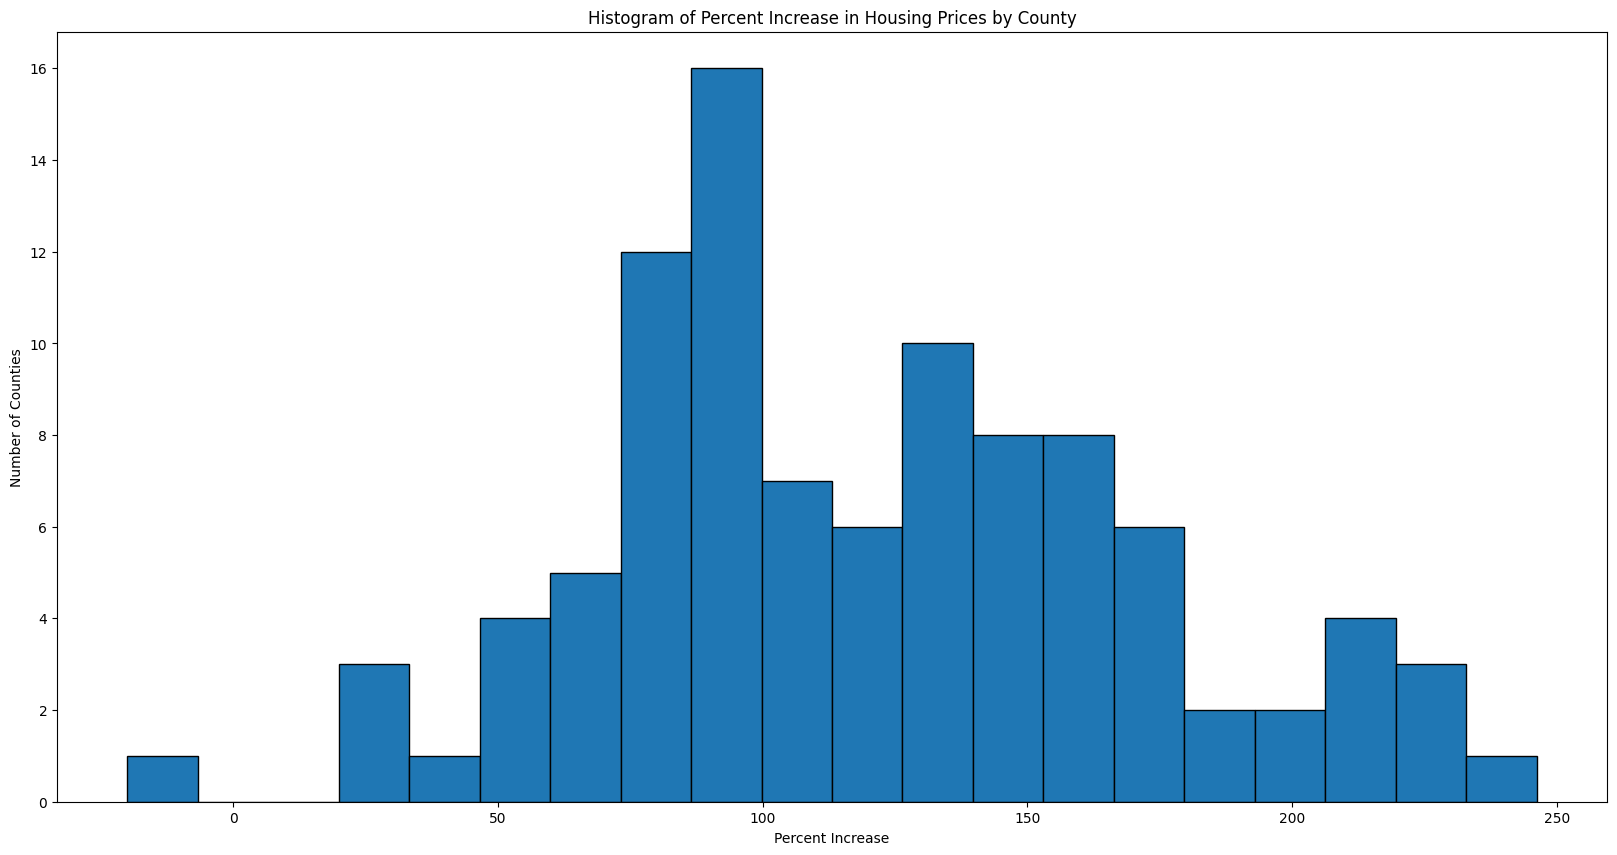

In [7]:
# Plot the histogram
plt.figure(figsize=(20, 10))
plt.hist(percent_increases['percent_increase'], bins=20, edgecolor='black')
plt.xlabel('Percent Increase')
plt.ylabel('Number of Counties')
plt.title('Histogram of Percent Increase in Housing Prices by County')

# Save the plot
plt.savefig('percent_increase_histogram.png')

# Show the plot
plt.show()

C:\Users\Ferdinand\AppData\Local\Temp\ipykernel_2180\3327126181.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_counties['is_near_metro'] = top_10_counties['metro'].notna()


              county  percent_increase  \
0        Clay County        246.198080   
1        Ashe County        228.948506   
2     Watauga County        227.415712   
3        Polk County        220.919146   
4  Montgomery County        218.703766   
5    Carteret County        213.250317   
6       Macon County        209.166298   
7      Yancey County        207.018165   
8    Buncombe County        204.434073   
9   Currituck County        198.775279   

                                        metro  is_near_metro  
0                                        None          False  
1                                        None          False  
2                                   Boone, NC           True  
3                                        None          False  
4                                        None          False  
5                           Morehead City, NC           True  
6                                        None          False  
7                                

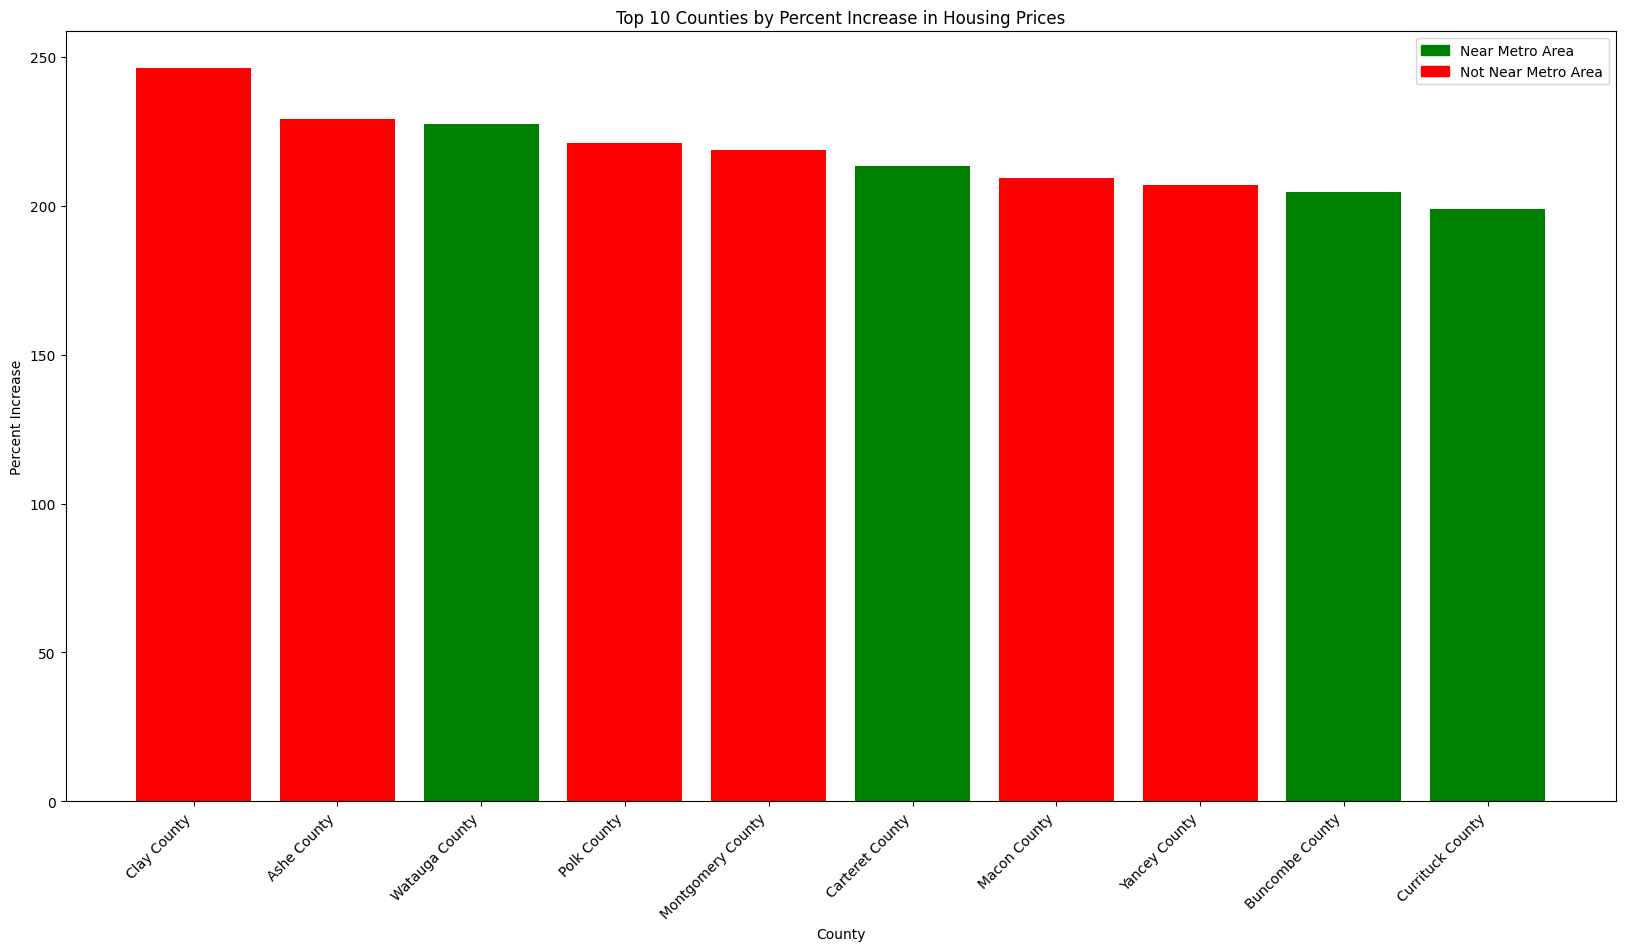

In [8]:
# Merge the percent increases with the original data to get the metro area info
merged_data = percent_increases.merge(rdf[['county', 'metro']].drop_duplicates(), on='county')

# Rank the counties by percent increase in descending order
merged_data = merged_data.sort_values(by='percent_increase', ascending=False)

# Identify the top 10 counties
top_10_counties = merged_data.head(10)

# Check if these top counties are near a metro area
top_10_counties['is_near_metro'] = top_10_counties['metro'].notna()

# Print the result
print(top_10_counties)

# Plot the result
plt.figure(figsize=(20, 10))

# Define colors for counties near metro areas and those not near metro areas
colors = ['green' if is_near else 'red' for is_near in top_10_counties['is_near_metro']]

plt.bar(top_10_counties['county'], top_10_counties['percent_increase'], color=colors)
plt.xlabel('County')
plt.ylabel('Percent Increase')
plt.title('Top 10 Counties by Percent Increase in Housing Prices')

# Create custom legend
from matplotlib.patches import Patch
legend_handles = [Patch(color='green', label='Near Metro Area'), Patch(color='red', label='Not Near Metro Area')]
plt.legend(handles=legend_handles, loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot
plt.savefig('top_10_counties_percent_increase.png')

# Show the plot
plt.show()

In [1]:
m_df=st.mean(df['Price'])
d_df=st.median(df['Price'])

NameError: name 'st' is not defined